In [140]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re
from nltk.util import ngrams
import pandas as pd
import spacy
from matplotlib import pyplot as plt

stop_words = set(stopwords.words('english'))
%matplotlib inline

# N-Gram feature extraction

In the fields of computational linguistics and probability, an n-gram is a contiguous sequence of n items from a given sample of text or speech. 

A collection of unigrams (what bag of words is) cannot capture phrases and multi-word expressions, effectively disregarding any word order dependence. Additionally, the bag of words model doesn’t account for potential misspellings or word derivations.

N-grams to the rescue! Instead of building a simple collection of unigrams (n=1), one might prefer a collection of bigrams (n=2), where occurrences of pairs of consecutive words are counted.

One might alternatively consider a collection of character n-grams, a representation resilient against misspellings and derivations.

In [122]:
corpora = ['The quick brown fox.','Jumps over the lazy dog!']
ngram_vectorizer = CountVectorizer(analyzer='word', ngram_range=(1, 2))
counts = ngram_vectorizer.fit_transform(corpora)

In [123]:
ngram_vectorizer.vocabulary_

{'the': 5,
 'quick': 3,
 'brown': 0,
 'fox': 2,
 'the quick': 6,
 'quick brown': 4,
 'brown fox': 1}

In [23]:
counts.toarray().astype(int)

array([[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1],
       [0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0]])

# Lemmatization

In [ ]:
# create a spaCy tokenizer
spacy.load('en')
#spacy.load('en_core_web_sm')
lemmatizer = spacy.lang.en.English()

In [129]:
text = "Several women told me I have lying eyes"
tokens = lemmatizer(text)
' '.join([token.lemma_ for token in tokens])

'Several woman tell me I have lie eye'

# N-Gram Fequency

Datasource is from [Kaggle](https://www.kaggle.com/justjun0321/way-to-google-get-a-job-in-goggle-word-cloud/data)

In [64]:
df = pd.read_csv("job_skills.csv")
df.Responsibilities.dropna(inplace=True)

In [65]:
df.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...


In [66]:
# create a spaCy tokenizer
spacy.load('en')
#spacy.load('en_core_web_sm')
lemmatizer = spacy.lang.en.English()

# remove html entities from docs and
# set everything to lowercase
def my_preprocessor(text):
    text = text.lower()
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub(r"\\", "", text)
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)
    text = re.sub('[^a-zA-Z0-9 ?!]+', '', text)
    text = text.strip(' ')
    return(text)

# tokenize the doc and lemmatize its tokens
def my_tokenizer(doc):
    tokens = lemmatizer(doc)
    return([token.lemma_ for token in tokens])

def get_top_n_words(corpus, ngram_min=1, ngram_max=4):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    
    get_top_n_words(["I love Python", "Python is a language programming", "Hello world", "I love the world"]) -> 
    [('python', 2),
     ('world', 2),
     ('love', 2),
     ('hello', 1),
     ('is', 1),
     ('programming', 1),
     ('the', 1),
     ('language', 1)]
    """
    vec = CountVectorizer(stop_words = stop_words,analyzer='word', preprocessor=my_preprocessor, 
                          tokenizer=my_tokenizer, ngram_range=(ngram_min, ngram_max)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    return pd.DataFrame(words_freq, columns=['term', 'frequency'])

In [93]:
df_res = get_top_n_words(df["Responsibilities"].dropna())
df_res['count'] = df_res['term'].str.split().apply(len)

In [156]:
df_res.loc[df_res['count'] >= 1, ['term', 'frequency']][:10]

,term,frequency
0,team,1428
1,product,1304
2,google,1292
3,business,1242
4,partner,1160
5,customer,984
6,work,893
7,develop,779
8,manage,673
9,market,621


In [157]:
df_res.loc[df_res['count'] >= 2 , ['term', 'frequency']][:10]

,term,frequency
34,google cloud,374
50,cross functional,268
77,cloud platform,192
87,google cloud platform,182
110,work closely,150
117,well practice,145
126,business growth,133
130,functional team,128
135,cross functional team,125
145,sale team,115


In [98]:
df_res.loc[df_res['count'] >= 3][:10]

,term,frequency,count
87,google cloud platform,182,3
135,cross functional team,125,3
293,google intern give,69,3
294,intern give lot,69,3
295,give lot responsibility,69,3
296,lot responsibility opportunity,69,3
297,meaningful contribution team,69,3
298,contribution team specific,69,3
299,team specific responsibility,69,3
300,specific responsibility assign,69,3


In [115]:
df_mq = get_top_n_words(df["Minimum Qualifications"].dropna())
df_mq['count'] = df_mq['term'].str.split().apply(len)

In [121]:
df_mq.loc[df_mq['count'] >= 2][:10]

,term,frequency,count
4,equivalent practical,993,2
5,practical experience,993,2
6,equivalent practical experience,993,3
9,ba b,835,2
10,b degree,835,2
12,ba b degree,792,3
13,degree equivalent,612,2
14,degree equivalent practical,609,3
15,degree equivalent practical experience,609,4
17,b degree equivalent,524,3


In [118]:
df_pq = get_top_n_words(df["Preferred Qualifications"].dropna())
df_pq['count'] = df_pq['term'].str.split().apply(len)

In [120]:
df_pq.loc[df_pq['count'] >= 2][:10]

,term,frequency,count
16,skill ability,427,2
31,communication skill,314,2
43,project management,252,2
50,experience work,243,2
52,analytic skill,241,2
58,fast pace,225,2
62,problem solve,212,2
66,cross functional,199,2
67,demonstrate ability,199,2
68,ability work,198,2


In [159]:
from wordcloud import WordCloud

def plot_word_cloud(terms):
    text = terms.values
    text = ' '.join(list(text))
    # lower max_font_size
    wordcloud = WordCloud(max_font_size=40,background_color="white").generate(text)
    plt.figure(figsize=(12, 12))
    plt.margins(x=0, y=0)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

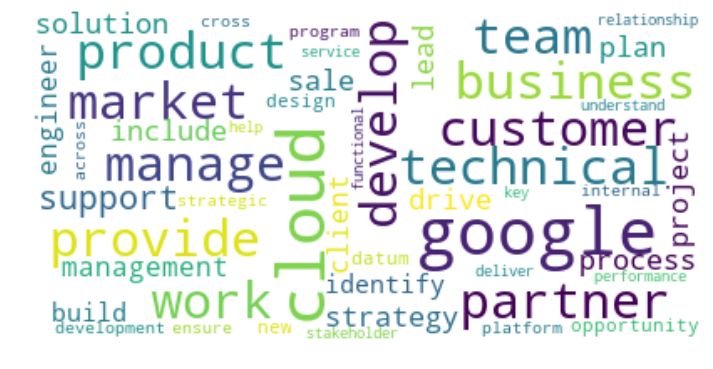

In [160]:
plot_word_cloud(df_res.loc[df_res['count'] >= 1, "term"][:50])

# N-Gram TF-IDF Frequency

In [161]:
def get_top_dfidf_words(corpus, ngram_min=1, ngram_max=4):

    tfidf_vec = TfidfVectorizer(stop_words = stop_words,analyzer='word', preprocessor=my_preprocessor, 
                          tokenizer=my_tokenizer, ngram_range=(ngram_min, ngram_max), use_idf=True).fit(corpus)
    bag_of_words = tfidf_vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in tfidf_vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return pd.DataFrame(words_freq, columns=['term', 'tfidf'])

In [162]:
tfidf_res = get_top_dfidf_words(df.Responsibilities)
tfidf_res['count'] = tfidf_res['term'].str.split().apply(len)

In [168]:
tfidf_res.loc[tfidf_res['count'] >= 1, ['term', 'tfidf']][:10]

,term,tfidf
0,google,23.013897
1,product,22.317012
2,customer,21.940652
3,team,21.851152
4,responsibility,21.808378
5,business,21.288086
6,partner,21.279230
7,intern,18.944832
8,work,15.633797
9,project,15.315931


In [164]:
tfidf_res.loc[tfidf_res['count'] >= 2, ['term', 'tfidf']][:10]

,term,tfidf
29,google cloud,10.855835
35,project determine,10.153387
36,determine base,10.153387
37,project determine base,10.153387
47,specific responsibility,9.426145
52,responsibility assign,8.807705
55,google intern,8.795886
56,intern give,8.795886
57,give lot,8.795886
58,lot responsibility,8.795886


In [165]:
tfidf_res.loc[tfidf_res['count'] >= 3][:10]

,term,tfidf,count
37,project determine base,10.153387,3
65,google intern give,8.795886,3
66,intern give lot,8.795886,3
67,give lot responsibility,8.795886,3
68,lot responsibility opportunity,8.795886,3
69,meaningful contribution team,8.795886,3
70,contribution team specific,8.795886,3
71,team specific responsibility,8.795886,3
72,specific responsibility assign,8.795886,3
73,responsibility assign intern,8.795886,3


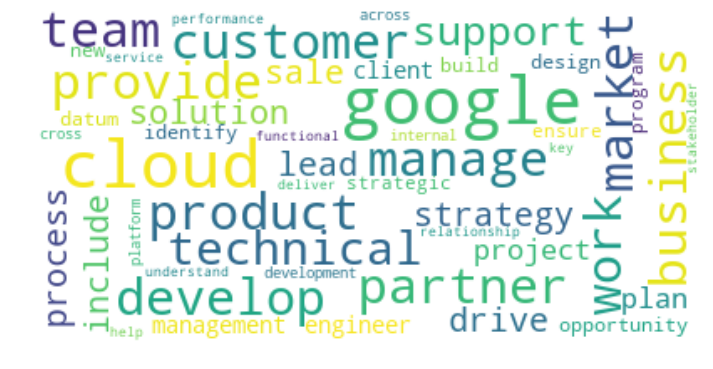

In [166]:
plot_word_cloud(df_res.loc[df_res['count'] >= 1, "term"][:50])